In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# data='../../../data/CURVES/CANCER_UTERUS/National_ROC_CURVE_Female.csv'
zt=zedstat.processRoc(df=pd.read_csv('/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/KPgrant/data/CURVES/CANCER_UTERUS/National_ROC_CURVE_Female.csv'),
           order=3, 
           total_samples=1.4*1e6,
           positive_samples=6000,
           alpha=0.01,
           prevalence=.0038)


In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=False)
zt.usample(precision=3)
zt.getBounds()

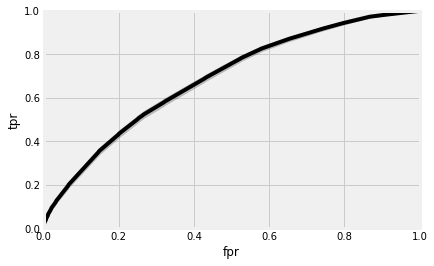

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [5]:
zt.auc()

(0.6878513293543136, 0.6996172843790373, 0.67608537432959)

In [6]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,NaN,0.996200,0.996200,NaN,1.000000,1.029406
0.001,0.020347,0.053042,0.994789,0.996271,14.723411,0.981117,0.008912
0.002,0.026135,0.038636,0.993484,0.996289,10.550397,0.976615,0.007363
0.003,0.029481,0.035479,0.992666,0.996298,9.666337,0.974067,0.007050
0.004,0.032827,0.032321,0.991849,0.996308,8.782277,0.971519,0.006738
...,...,...,...,...,...,...,...
0.996,0.999218,0.003814,0.007774,0.999253,1.003610,0.195918,0.003126
0.997,0.999413,0.003810,0.006780,0.999253,1.002707,0.195918,0.003126
0.998,0.999609,0.003807,0.005787,0.999253,1.001805,0.195918,0.003126


In [7]:
zt.operating_zone(LRminus=.99,LRplus=2)
display(zt._operating_zone)
F=0.21*(0.95-0.69) + 0.08*(0.95-0.17)
F=0.33*(0.95-0.17)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100,
                      five_yr_survival=0.81,factor=F)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100,
                      five_yr_survival=0.81,factor=F)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.001,0.020347,0.053042,0.994789,0.996271,14.723411,0.981117,0.008912
high sensitivity,0.251,0.503261,0.007592,0.748054,0.997477,2.005551,0.663154,0.004033


100 6.4526969583067935 383.8217437170615 26215.78947368421 390.2744406753683 93.54730304169321 25831.96772996715 1237
100 49.61452404061792 6595.3787692734295 26215.78947368421 6644.993293314047 50.38547595938208 19620.41070441078 2739
high precision operation:
 For every 100 positive instances
 we raise 390 flags,
 out of which 6 are true positives
 384 are false alarms
 94 cases are missed
 Number needed to screen is 1237


high recall operation:
 For every 100 positive instances
 we raise 6645 flags,
 out of which 50 are true positives
 6595 are false alarms
 50 cases are missed
 Number needed to screen is 2739


## writing tables to latex

In [8]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [9]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.001,$0.020 \pm 0.004$,$0.053 \pm 0.015$,$0.994 \pm 1.784$,$0.996 \pm 1.779$,$14.72 \pm 4.694$,$0.981 \pm 0.004$,0.008912
0.251,$0.503 \pm 0.016$,$0.007 \pm 0.000$,$0.748 \pm 6.318$,$0.997 \pm 8.424$,$2.005 \pm 0.066$,$0.663 \pm 0.022$,0.004033


In [10]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

In [11]:
! cat tmp.tex


\begin{tabular}{L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}}\hline
fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline
0.000& $0.0  \pm  0.0$ & $nan  \pm  0.016$ & $0.996  \pm  0.0$ & $0.996  \pm  0.0$ & $nan  \pm  0.555$ & $1.0  \pm  0.0$ &1.029\\\hline
0.001& $0.020  \pm  0.004$ & $0.053  \pm  0.015$ & $0.994  \pm  1.784$ & $0.996  \pm  1.779$ & $14.72  \pm  4.694$ & $0.981  \pm  0.004$ &0.009\\\hline
0.002& $0.026  \pm  0.005$ & $0.038  \pm  0.009$ & $0.993  \pm  2.015$ & $0.996  \pm  2.012$ & $10.55  \pm  2.652$ & $0.976  \pm  0.005$ &0.007\\\hline
0.003& $0.029  \pm  0.005$ & $0.035  \pm  0.006$ & $0.992  \pm  2.137$ & $0.996  \pm  2.136$ & $9.666  \pm  1.874$ & $0.974  \pm  0.005$ &0.007\\\hline
0.004& $0.032  \pm  0.005$ & $0.032  \pm  0.005$ & $0.991  \pm  2.251$ & $0.996  \pm  2.252$ & $8.782  \pm  1.481$ & $0.971  \pm  0.005$ &0.007\\\hline
0.005& $0.036  \pm  0.006$ & $0.029  \pm  0.004$ & $0.991  \pm  2.359$ & $0.996  \pm  2.362$ & $7.898  \pm  1.241$ & $0.968  \pm  0